In [ ]:
import os
import numpy as np
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools


from skimage.filters import gaussian
from skimage.util import random_noise
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split



import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import model_from_json
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D,Dropout,MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [ ]:
# accsess the data files and dir
cancer_rays_dir     = os.listdir("/content/drive/MyDrive/Breast_Histopathology_dataset/DataNew") 
all_rays_dir        = "all_rays_dir"  # is this path we will put all the images
cancer_rays_dir_str = "/content/drive/MyDrive/Breast_Histopathology_dataset/DataNew/"

In [ ]:
print(cancer_rays_dir)
print(len(cancer_rays_dir)) 

['10277', '9227', '9323', '10300', '10256', '10278']
6


In [ ]:
os.mkdir(all_rays_dir)

FileExistsError: ignored

In [ ]:
all_rays_dir_lst = os.listdir('./all_rays_dir') 

In [ ]:
#Here we will move the images, but by adding a small part in their path, which indicates that they are negative or positive
for patient in cancer_rays_dir:   
    path_0 = cancer_rays_dir_str + str(patient) + '/0'
    path_1 = cancer_rays_dir_str + str(patient) + '/1'
    file_list_0 = os.listdir(path_0)   
    file_list_1 = os.listdir(path_1)
    for fname in file_list_0:
            src = os.path.join(path_0, fname)
            dst = os.path.join(all_rays_dir, fname)
            shutil.copyfile(src, dst)
    for fname in file_list_1:
        src = os.path.join(path_1, fname)
        dst = os.path.join(all_rays_dir, fname)
        shutil.copyfile(src, dst)

In [ ]:
all_rays_dir_lst = os.listdir('./all_rays_dir') 
len(all_rays_dir_lst)

7135

In [ ]:
data = pd.DataFrame(all_rays_dir_lst, columns=['image_id'])
data.head()

,image_id
0,10277_idx5_x701_y2001_class0.png
1,10277_idx5_x701_y951_class0.png
2,10300_idx5_x1201_y1701_class0.png
3,9323_idx5_x351_y1701_class0.png
4,10256_idx5_x751_y251_class0.png


In [ ]:
#Based on the addition that we added earlier in the path, we divide the data
def extract_target(x):
    a = x.split('_')
    b = a[4]
    target = b[5] 
    return target

data['target'] = data['image_id'].apply(extract_target)

data.head(10)

,image_id,target
0,10277_idx5_x701_y2001_class0.png,0
1,10277_idx5_x701_y951_class0.png,0
2,10300_idx5_x1201_y1701_class0.png,0
3,9323_idx5_x351_y1701_class0.png,0
4,10256_idx5_x751_y251_class0.png,0
5,9323_idx5_x1501_y1001_class0.png,0
6,9323_idx5_x1551_y201_class0.png,0
7,10277_idx5_x901_y1601_class1.png,1
8,9323_idx5_x1551_y451_class0.png,0
9,9323_idx5_x351_y701_class0.png,0


In [ ]:
def extract_patient_id(x):
    # split into a list
    a = x.split('_')
    patient_id = a[0]
    
    return patient_id
data['patient_id'] = data['image_id'].apply(extract_patient_id)
data.head()

,image_id,target,patient_id
0,10277_idx5_x701_y2001_class0.png,0,10277
1,10277_idx5_x701_y951_class0.png,0,10277
2,10300_idx5_x1201_y1701_class0.png,0,10300
3,9323_idx5_x351_y1701_class0.png,0,9323
4,10256_idx5_x751_y251_class0.png,0,10256


In [ ]:
data['target'].value_counts()

0    6303
1     832
Name: target, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


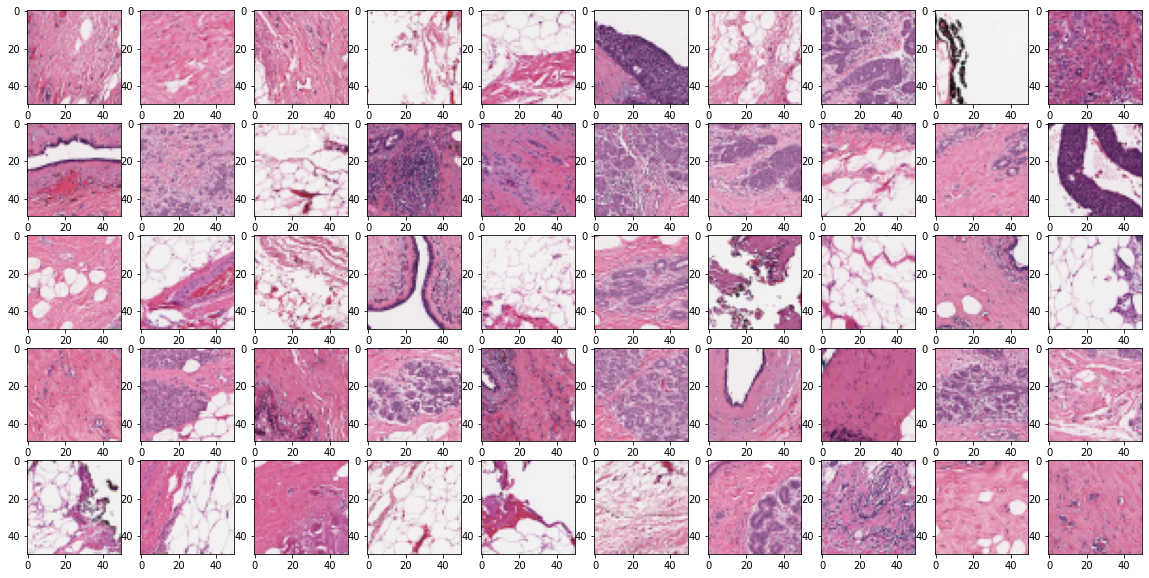

In [ ]:
data.target = data.target.astype(np.int)
fig, ax = plt.subplots(5,10,figsize=(20,10))
pos_selection = np.random.choice(data[data.target ==1].index, size=50, replace=False,)
neg_selection = np.random.choice(data[data.target ==0].index, size=50, replace=False,)
for n in range(5):
    for m in range(10):
        idx = neg_selection[m + 10*n]
        path =os.path.join(all_rays_dir,data.loc[idx, 'image_id'])
        image = mpimg.imread(path)
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

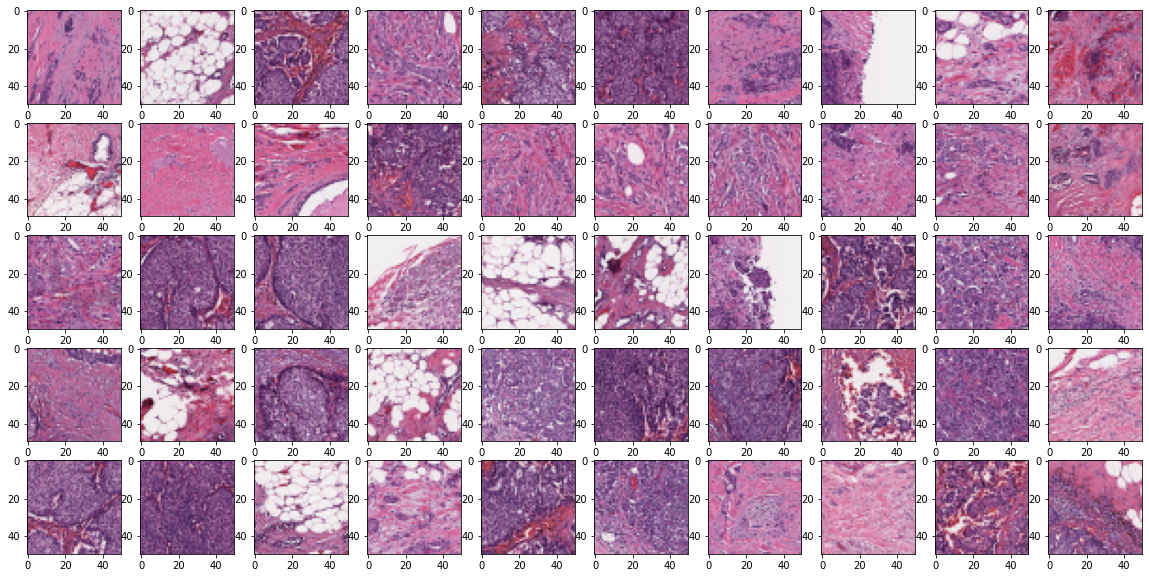

In [ ]:
fig, ax = plt.subplots(5,10,figsize=(20,10))
for n in range(5):
    for m in range(10):
        idx = pos_selection[m + 10*n]
        path =os.path.join(all_rays_dir,data.loc[idx, 'image_id'])
        image = mpimg.imread(path)
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


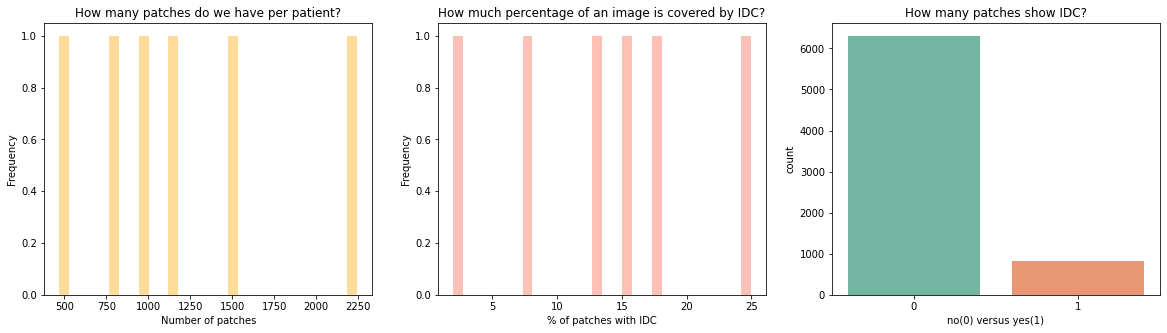

In [ ]:
cancer_perc = data.groupby("patient_id").target.value_counts()/ data.groupby("patient_id").target.size()
cancer_perc = cancer_perc.unstack()

fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.distplot(data.groupby("patient_id").size(), ax=ax[0], color="Orange", kde=False, bins=30)
ax[0].set_xlabel("Number of patches")
ax[0].set_ylabel("Frequency");
ax[0].set_title("How many patches do we have per patient?");
sns.distplot(cancer_perc.loc[:, 1]*100, ax=ax[1], color="Tomato", kde=False, bins=30)
ax[1].set_title("How much percentage of an image is covered by IDC?")
ax[1].set_ylabel("Frequency")
ax[1].set_xlabel("% of patches with IDC");
sns.countplot(data.target, palette="Set2", ax=ax[2]);
ax[2].set_xlabel("no(0) versus yes(1)")
ax[2].set_title("How many patches show IDC?");

In [ ]:
def extract_coords(df):
    coord = df.path.str.rsplit("_", n=4, expand=True)
    coord = coord.drop([0, 1, 4], axis=1)
    coord = coord.rename({2: "x", 3: "y"}, axis=1)
    coord.loc[:, "x"] = coord.loc[:,"x"].str.replace("x", "", case=False).astype(np.int)
    coord.loc[:, "y"] = coord.loc[:,"y"].str.replace("y", "", case=False).astype(np.int)
    df.loc[:, "x"] = coord.x.values
    df.loc[:, "y"] = coord.y.values
    return df

def get_cancer_dataframe(patient_id, cancer_id):
    path = cancer_rays_dir_str + patient_id + "/" + cancer_id
    files = os.listdir(path)
    dataframe = pd.DataFrame(files, columns=["filename"])
    path_names = path + "/" + dataframe.filename.values
    dataframe = dataframe.filename.str.rsplit("_", n=4, expand=True)
    dataframe.loc[:, "target"] = np.int(cancer_id)
    dataframe.loc[:, "path"] = path_names
    dataframe = dataframe.drop([0, 1, 4], axis=1)
    dataframe = dataframe.rename({2: "x", 3: "y"}, axis=1)
    dataframe.loc[:, "x"] = dataframe.loc[:,"x"].str.replace("x", "", case=False).astype(np.int)
    dataframe.loc[:, "y"] = dataframe.loc[:,"y"].str.replace("y", "", case=False).astype(np.int)
    return dataframe
def get_patient_dataframe(patient_id):
    df_0 = get_cancer_dataframe(patient_id, "0")
    df_1 = get_cancer_dataframe(patient_id, "1")
    patient_df = df_0.append(df_1)
    return patient_df

In [ ]:
example = get_patient_dataframe(data.patient_id.values[0])
example.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecat

,x,y,target,path
0,1351,1001,0,/content/drive/MyDrive/Breast_Histopathology_d...
1,1751,1951,0,/content/drive/MyDrive/Breast_Histopathology_d...
2,2001,1301,0,/content/drive/MyDrive/Breast_Histopathology_d...
3,2151,451,0,/content/drive/MyDrive/Breast_Histopathology_d...
4,1151,1701,0,/content/drive/MyDrive/Breast_Histopathology_d...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecat

IndexError: ignored

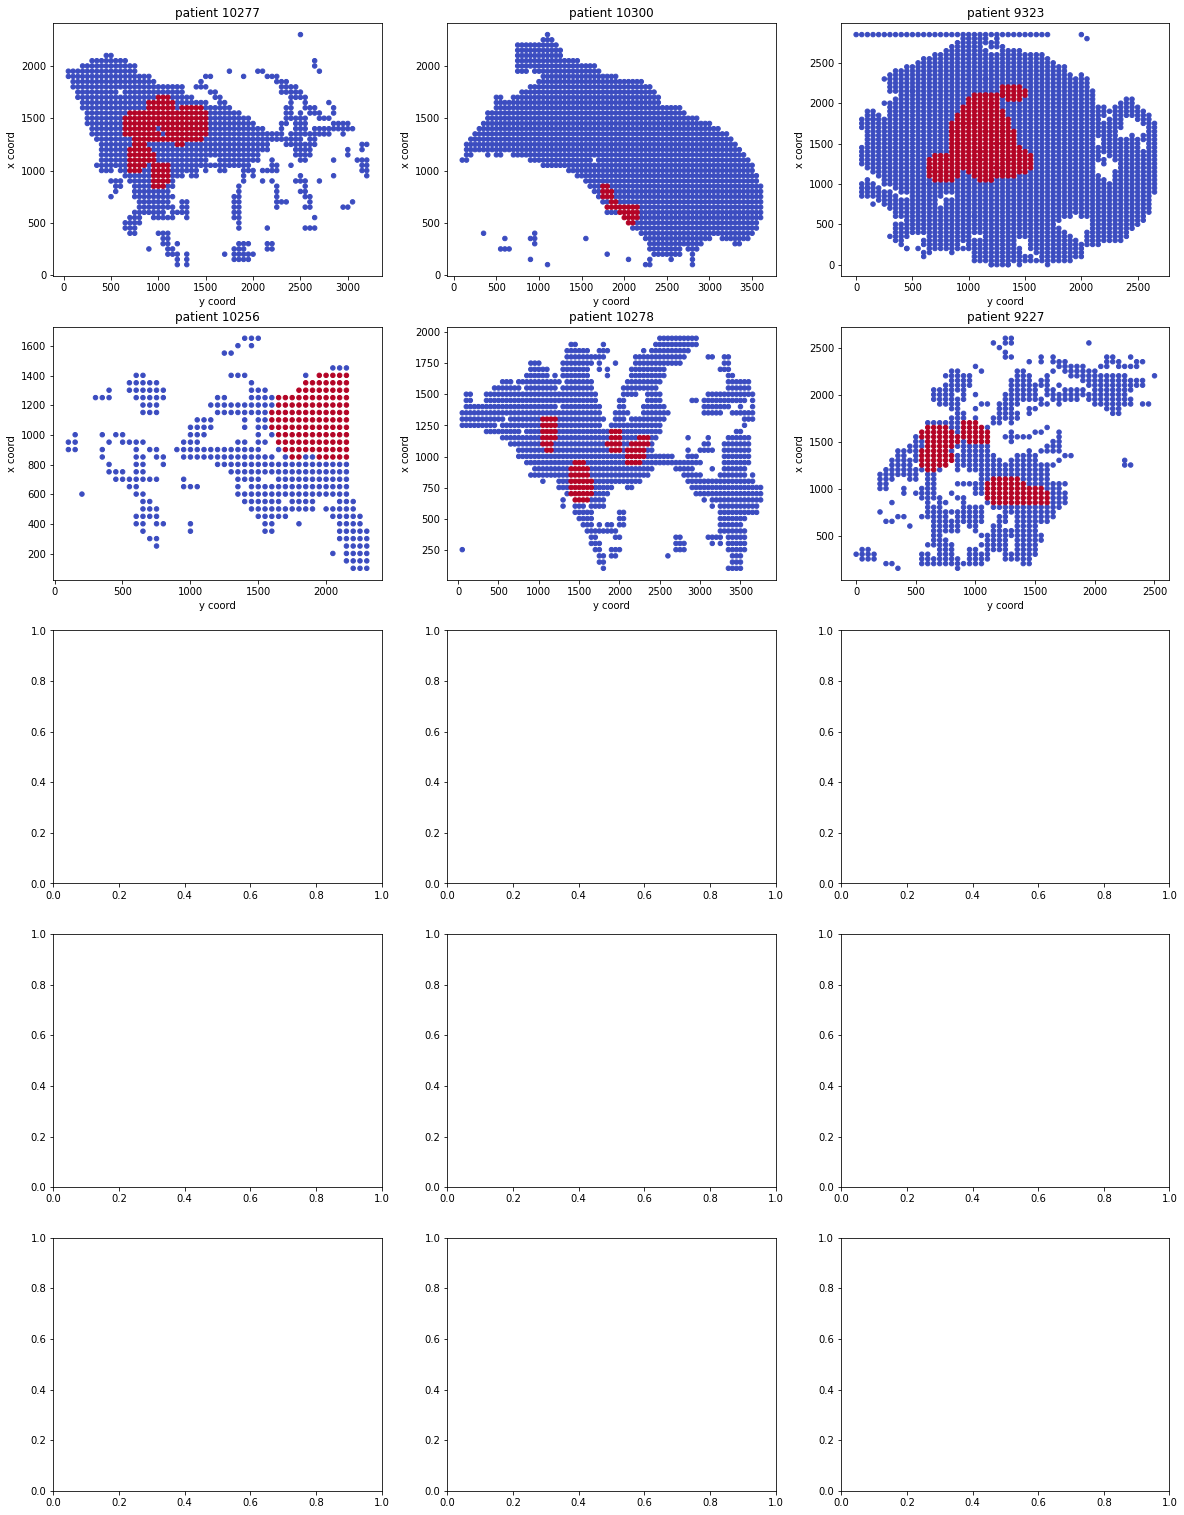

In [ ]:
fig, ax = plt.subplots(5,3,figsize=(20, 27))

patient_ids = data.patient_id.unique()

for n in range(5):
    for m in range(3):
        patient_id = patient_ids[m + 3*n]
        example_df = get_patient_dataframe(patient_id)
        
        ax[n,m].scatter(example_df.x.values, example_df.y.values, c=example_df.target.values, cmap="coolwarm", s=20);
        ax[n,m].set_title("patient " + patient_id)
        ax[n,m].set_xlabel("y coord")
        ax[n,m].set_ylabel("x coord")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


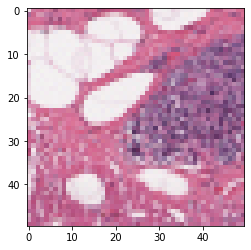

In [ ]:
data.target = data.target.astype(np.int)
random_image_path = np.random.choice(data[data.target ==0].index, size=1, replace=False,)
path =os.path.join(all_rays_dir,data.loc[random_image_path[0], 'image_id'])
image = mpimg.imread(path)
plt.imshow(image)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  """Entry point for launching an IPython kernel.


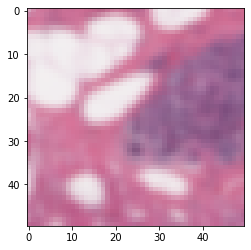

In [ ]:
gaussian_image = gaussian(image)
plt.imshow(gaussian_image)

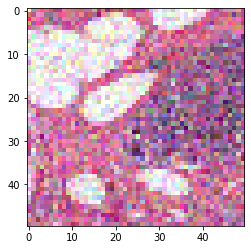

In [ ]:
noise_image = random_noise(image)
plt.imshow(noise_image)

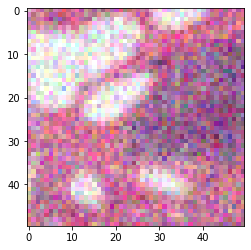

In [ ]:
noise_gaussian_image = random_noise(gaussian_image)
plt.imshow(noise_gaussian_image)

In [ ]:
#os.mkdir('image_processing') #We create a new file to process the data in
#os.mkdir('image_processing/noise_images')

FileExistsError: ignored

In [ ]:
#Here we take the image from the normal images folder, process it, and then save it in the new file
for normal_image in all_rays_dir_lst :
    path        = all_rays_dir+'/'+ normal_image
    img         = mpimg.imread( path ,0)
    noise_image = random_noise(img)
    fname       = normal_image
    new_path    = os.path.join('image_processing/noise_images',fname)
    mpimg.imsave(new_path, noise_image)
    

In [ ]:
# os.mkdir( 'image_processing/processd_data_train')
# os.mkdir( 'image_processing/processd_data_test')
# os.mkdir( 'image_processing/processd_data_train/zeros')
# os.mkdir( 'image_processing/processd_data_train/ones')
# os.mkdir( 'image_processing/processd_data_test/zeros')
# os.mkdir( 'image_processing/processd_data_test/ones')

FileExistsError: ignored

In [ ]:
processd_lst = os.listdir('image_processing/noise_images')
processd_lst_str = 'image_processing/noise_images'
processd_data = pd.DataFrame(processd_lst, columns=['image_id'])
processd_data.head()

,image_id
0,10277_idx5_x701_y2001_class0.png
1,10277_idx5_x701_y951_class0.png
2,10300_idx5_x1201_y1701_class0.png
3,9323_idx5_x351_y1701_class0.png
4,10256_idx5_x751_y251_class0.png


In [ ]:
def extract_target(x):
    a = x.split('_')
    b = a[4]
    target = b[5] 
    return target

processd_data['target'] = processd_data['image_id'].apply(extract_target)

processd_data.head(10)

,image_id,target
0,10277_idx5_x701_y2001_class0.png,0
1,10277_idx5_x701_y951_class0.png,0
2,10300_idx5_x1201_y1701_class0.png,0
3,9323_idx5_x351_y1701_class0.png,0
4,10256_idx5_x751_y251_class0.png,0
5,9323_idx5_x1501_y1001_class0.png,0
6,9323_idx5_x1551_y201_class0.png,0
7,10277_idx5_x901_y1601_class1.png,1
8,9323_idx5_x1551_y451_class0.png,0
9,9323_idx5_x351_y701_class0.png,0


In [ ]:
processd_data['target'].value_counts()

0    6303
1     832
Name: target, dtype: int64

In [ ]:
y = processd_data['target']
processd_train, processd_test = train_test_split(processd_data, test_size=0.10, random_state=101, stratify=y)
processd_test_pls =processd_test.image_id
processd_train_pls =processd_train.image_id

In [ ]:
processd_data.set_index('image_id', inplace=True)
for image in processd_test_pls:
    fname = image
    target = processd_data.loc[image,'target']
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(processd_lst_str, fname)
    dst = os.path.join("image_processing/processd_data_test", label, fname)
    shutil.copyfile(src, dst)

In [ ]:
for image in processd_train_pls:
    fname  = image
    target = processd_data.loc[image,'target']
    
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(processd_lst_str, fname)
    dst = os.path.join('image_processing/processd_data_train', label, fname)
    shutil.copyfile(src, dst)

In [ ]:
print(len(os.listdir('image_processing/processd_data_train/zeros')))
print(len(os.listdir('image_processing/processd_data_train/ones')))
print(len(os.listdir('image_processing/processd_data_test/zeros')))
print(len(os.listdir('image_processing/processd_data_test/ones')))

5808
785
763
109


In [ ]:
processd_lst = os.listdir('image_processing/noise_images')
processd_lst_str = 'image_processing/noise_images'
processd_data = pd.DataFrame(processd_lst, columns=['image_id'])
def extract_target(x):
    a = x.split('_')
    b = a[4]
    target = b[5] 
    return target

processd_data['target'] = processd_data['image_id'].apply(extract_target)

processd_data.head(10)

,image_id,target
0,10277_idx5_x701_y2001_class0.png,0
1,10277_idx5_x701_y951_class0.png,0
2,10300_idx5_x1201_y1701_class0.png,0
3,9323_idx5_x351_y1701_class0.png,0
4,10256_idx5_x751_y251_class0.png,0
5,9323_idx5_x1501_y1001_class0.png,0
6,9323_idx5_x1551_y201_class0.png,0
7,10277_idx5_x901_y1601_class1.png,1
8,9323_idx5_x1551_y451_class0.png,0
9,9323_idx5_x351_y701_class0.png,0


In [ ]:
# os.mkdir( 'image_processing/model_tst')
# os.mkdir( 'image_processing/model_tst/trainig')
# os.mkdir( 'image_processing/model_tst/testing')          
# os.mkdir( 'image_processing/model_tst/trainig/zeros')
# os.mkdir( 'image_processing/model_tst/trainig/ones')
# os.mkdir( 'image_processing/model_tst/testing/zeros')
# os.mkdir( 'image_processing/model_tst/testing/ones')

FileExistsError: ignored

In [ ]:
df_0 = processd_data[processd_data['target'] == '0'].sample(1000, random_state=101) #changed this and the one below it from 10000 to 1000
df_1 = processd_data[processd_data['target'] == '1'].sample(100, random_state=101)
test_data =pd.DataFrame(data)
test_data = pd.concat([df_0, df_1], axis=0).reset_index(drop=True)
test_y = test_data['target']
test_data_train, test_data_test = train_test_split(test_data, test_size=0.10, random_state=101, stratify=test_y)
sts_train = test_data_train.image_id
tst_test  = test_data_test.image_id
test_data.set_index('image_id', inplace=True)
for image in sts_train:
    fname  = image
    target = test_data.loc[image,'target']
    
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join('image_processing/model_tst/trainig', label, fname)
    shutil.copyfile(src, dst)
for image in tst_test:
    fname  = image
    target = test_data.loc[image,'target']
    
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join('image_processing/model_tst/testing', label, fname)
    shutil.copyfile(src, dst)    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


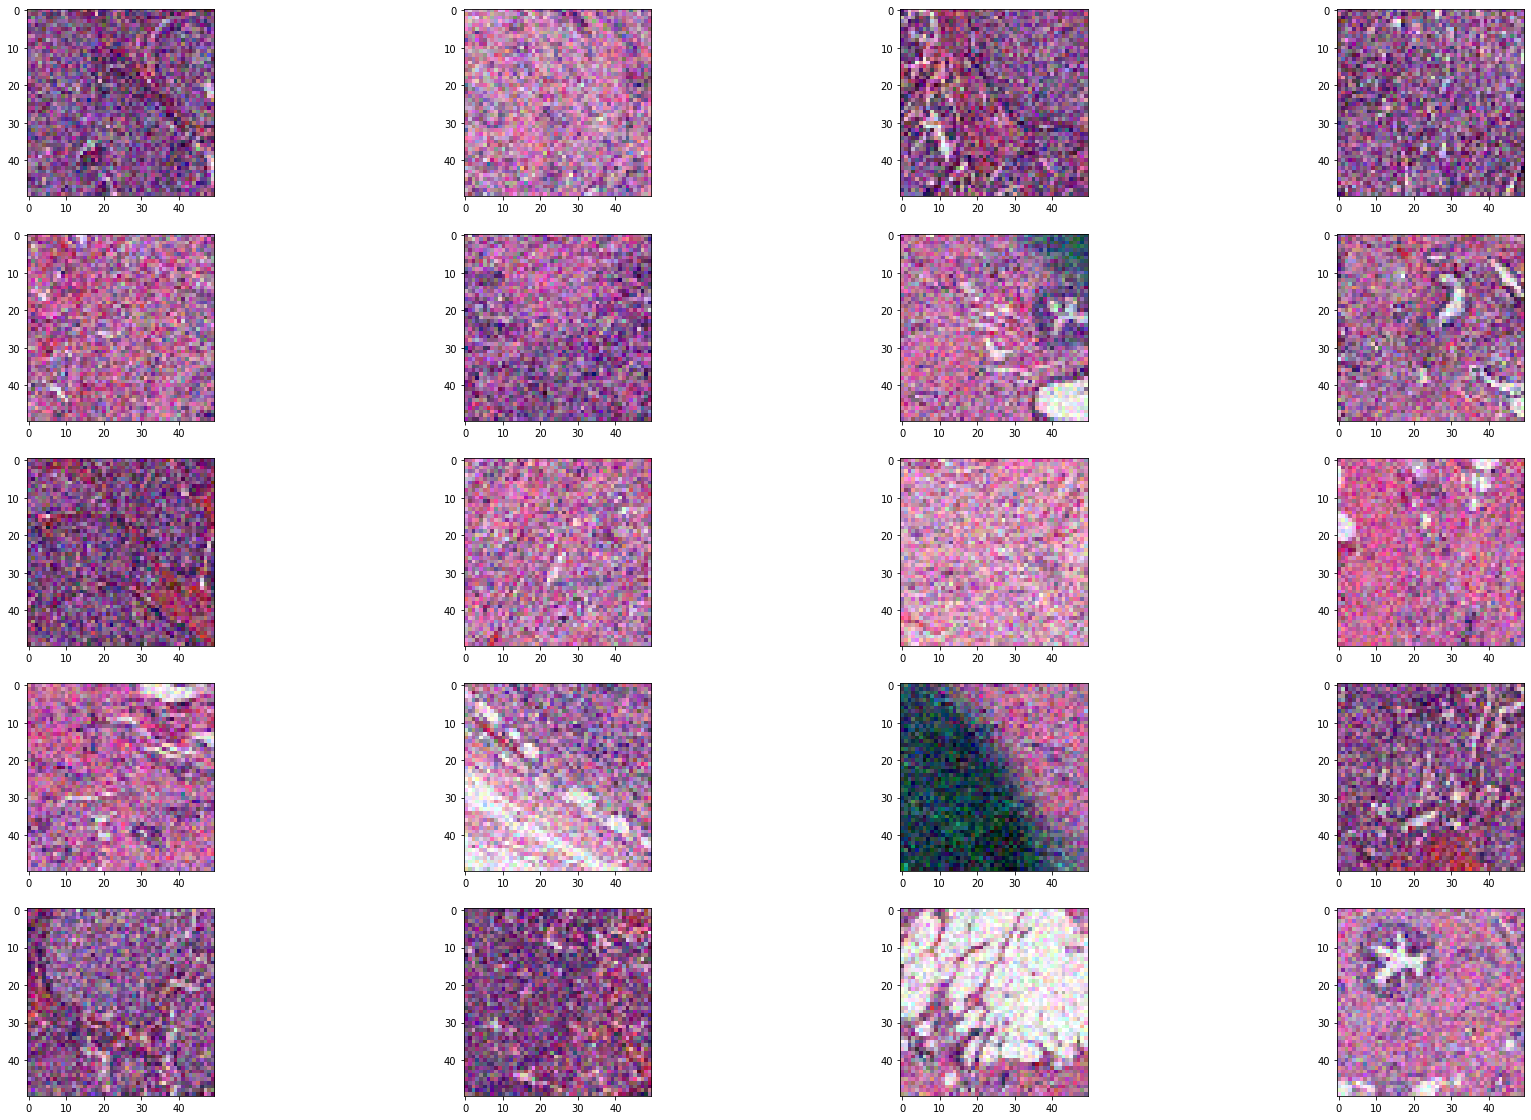

In [ ]:
processd_data.target = processd_data.target.astype(np.int)
fig, ax = plt.subplots(5,4,figsize=(30,20))
pos_selection = np.random.choice(processd_data[processd_data.target==1].index.values, size=20, replace=False)
neg_selection = np.random.choice(processd_data[processd_data.target==0].index.values, size=20, replace=False)
for n in range(5):
    for m in range(4):
        idx = pos_selection[m + 4*n]
        path =os.path.join(processd_lst_str,processd_data.loc[idx, 'image_id'])
        image = mpimg.imread(path)
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

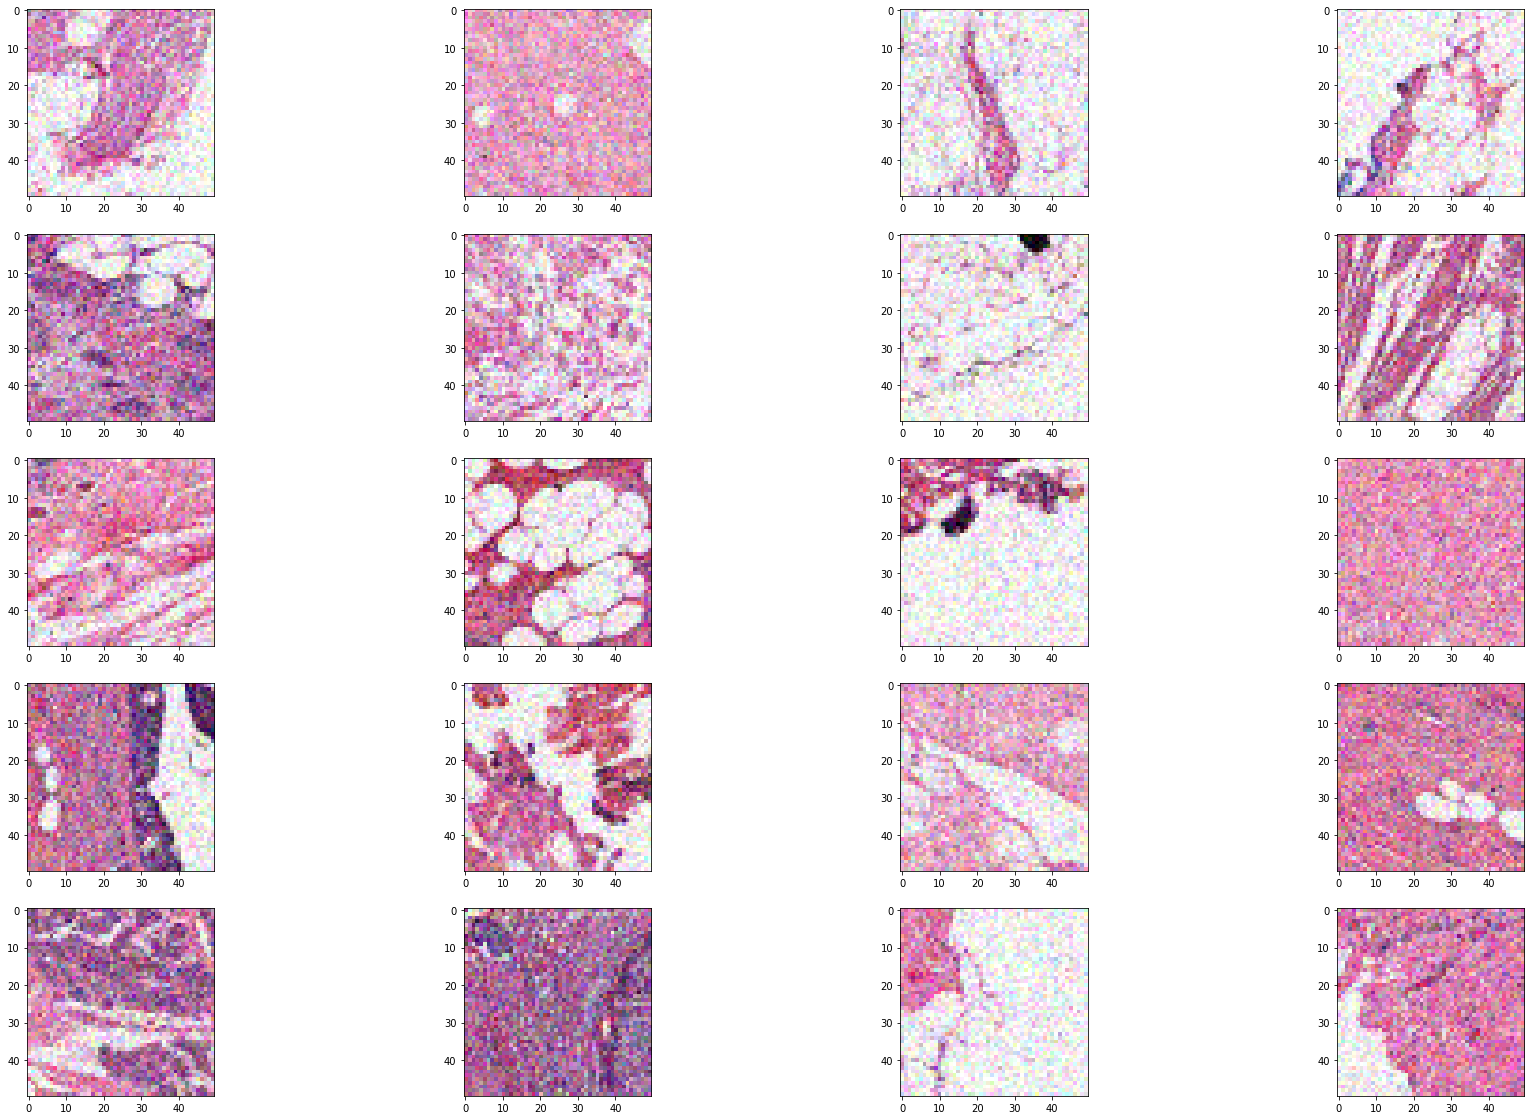

In [ ]:
fig, ax = plt.subplots(5,4,figsize=(30,20))
for n in range(5):
    for m in range(4):
        idx = neg_selection[m + 4*n]
        path =os.path.join(processd_lst_str,processd_data.loc[idx, 'image_id'])
        image = mpimg.imread(path)
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

In [ ]:
data_processd_test_generation = ImageDataGenerator(rescale=1.0/255)
train_generation_processd = data_processd_test_generation.flow_from_directory("image_processing/model_tst/trainig", target_size=(50,50), batch_size=10,class_mode='categorical')
test_generation_processd = data_processd_test_generation.flow_from_directory("image_processing/model_tst/testing",target_size=(50,50),batch_size=10,class_mode='categorical')

Found 990 images belonging to 2 classes.
Found 110 images belonging to 2 classes.


In [ ]:
my_model_im_processd =Sequential()
my_model_im_processd.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(50,50,3),activation='relu'))
my_model_im_processd.add(MaxPool2D(pool_size=(2,2)))


my_model_im_processd.add(Flatten())

my_model_im_processd.add(Dense(128,activation='relu'))

my_model_im_processd.add(Dense(2,activation='softmax'))

my_model_im_processd.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics= ['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)
my_model_im_processd.fit_generator(train_generation_processd,validation_data=test_generation_processd,epochs=60, verbose=1,callbacks=early_stop)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/60
99/99 [==============================] - 5s 45ms/step - loss: 0.3926 - accuracy: 0.8990 - val_loss: 0.3439 - val_accuracy: 0.9091
Epoch 2/60
99/99 [==============================] - 5s 48ms/step - loss: 0.2591 - accuracy: 0.9091 - val_loss: 0.2226 - val_accuracy: 0.9091
Epoch 3/60
99/99 [==============================] - 5s 46ms/step - loss: 0.2465 - accuracy: 0.9101 - val_loss: 0.2072 - val_accuracy: 0.9091
Epoch 4/60
99/99 [==============================] - 4s 43ms/step - loss: 0.2254 - accuracy: 0.9111 - val_loss: 0.2104 - val_accuracy: 0.9091
Epoch 5/60
99/99 [==============================] - 4s 44ms/step - loss: 0.2200 - accuracy: 0.9152 - val_loss: 0.1888 - val_accuracy: 0.9182
Epoch 6/60
99/99 [==============================] - 4s 44ms/step - loss: 0.1946 - accuracy: 0.9253 - val_loss: 0.2011 - val_accuracy: 0.9182
Epoch 7/60
99/99 [==============================] - 4s 42ms/step - loss: 0.1790 - accuracy: 0.9313 - val_loss: 0.2446 - val_accuracy: 0.9091


In [ ]:
os.mkdir( 'image_processing/normal')
os.mkdir( 'image_processing/normal/model_tst') 
os.mkdir( 'image_processing/normal/model_tst/trainig')
os.mkdir( 'image_processing/normal/model_tst/testing')
os.mkdir( 'image_processing/normal/model_tst/trainig/zeros')
os.mkdir( 'image_processing/normal/model_tst/trainig/ones')
os.mkdir( 'image_processing/normal/model_tst/testing/zeros')
os.mkdir( 'image_processing/normal/model_tst/testing/ones')

In [ ]:
data = pd.DataFrame(all_rays_dir_lst, columns=['image_id'])
data['target'] = data['image_id'].apply(extract_target)
df_0 = data[data['target'] == '0'].sample(1000, random_state=101)
df_1 = data[data['target'] == '1'].sample(100, random_state=101)
test_data =pd.DataFrame(data)
test_data = pd.concat([df_0, df_1], axis=0).reset_index(drop=True)
test_y = test_data['target']
test_data_train, test_data_test = train_test_split(test_data, test_size=0.10, random_state=101, stratify=test_y)
sts_train = test_data_train.image_id
tst_test  = test_data_test.image_id
test_data.set_index('image_id', inplace=True)
for image in sts_train:
    fname  = image
    target = test_data.loc[image,'target']
    
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join('image_processing/normal/model_tst/trainig', label, fname)
    shutil.copyfile(src, dst)
for image in tst_test:
    fname  = image
    target = test_data.loc[image,'target']
    
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join('image_processing/normal/model_tst/testing', label, fname)
    shutil.copyfile(src, dst)    

In [ ]:
data_normal_test_generation = ImageDataGenerator(rescale=1.0/255)
train_generation_normal = data_normal_test_generation.flow_from_directory("image_processing/normal/model_tst/trainig", target_size=(50,50), batch_size=10,class_mode='categorical')
test_generation_normal = data_normal_test_generation.flow_from_directory("image_processing/normal/model_tst/testing",target_size=(50,50),batch_size=10,class_mode='categorical')

Found 990 images belonging to 2 classes.
Found 110 images belonging to 2 classes.


In [ ]:
my_model_im_norm =Sequential()
my_model_im_norm.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(50,50,3),activation='relu'))
my_model_im_norm.add(MaxPool2D(pool_size=(2,2)))


my_model_im_norm.add(Flatten())

my_model_im_norm.add(Dense(128,activation='relu'))
my_model_im_norm.add(Dense(2,activation='softmax'))

my_model_im_norm.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics= ['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)
my_model_im_processd.fit_generator(train_generation_normal,validation_data=test_generation_normal,epochs=60, verbose=1,callbacks=early_stop)

Epoch 1/60
 1/99 [..............................] - ETA: 5s - loss: 0.4330 - accuracy: 0.8000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


99/99 [==============================] - 4s 42ms/step - loss: 0.1723 - accuracy: 0.9333 - val_loss: 0.1997 - val_accuracy: 0.9182
Epoch 2/60
99/99 [==============================] - 4s 41ms/step - loss: 0.1484 - accuracy: 0.9475 - val_loss: 0.1871 - val_accuracy: 0.9182
Epoch 3/60
99/99 [==============================] - 4s 44ms/step - loss: 0.1484 - accuracy: 0.9434 - val_loss: 0.1752 - val_accuracy: 0.9273
Epoch 4/60
99/99 [==============================] - 4s 40ms/step - loss: 0.1077 - accuracy: 0.9667 - val_loss: 0.1719 - val_accuracy: 0.9364
Epoch 5/60
99/99 [==============================] - 4s 41ms/step - loss: 0.0855 - accuracy: 0.9657 - val_loss: 0.2154 - val_accuracy: 0.9364
Epoch 6/60
99/99 [==============================] - 4s 43ms/step - loss: 0.0902 - accuracy: 0.9707 - val_loss: 0.1723 - val_accuracy: 0.9273


In [ ]:
data = pd.DataFrame(all_rays_dir_lst, columns=['image_id'])
def extract_target(x):
    a = x.split('_')
    b = a[4]
    target = b[5] 
    return target

data['target'] = data['image_id'].apply(extract_target)

data.head()

,image_id,target
0,10277_idx5_x701_y2001_class0.png,0
1,10277_idx5_x701_y951_class0.png,0
2,10300_idx5_x1201_y1701_class0.png,0
3,9323_idx5_x351_y1701_class0.png,0
4,10256_idx5_x751_y251_class0.png,0


In [ ]:
y = data['target']
data_train, data_test = train_test_split(data, test_size=0.10, random_state=101, stratify=y)

In [ ]:
print(data_train.shape)
print(data_test.shape)

(6421, 2)
(714, 2)


In [ ]:
os.mkdir( 'train_dir')
os.mkdir('test_dir')

In [ ]:
os.mkdir( 'train_dir/zeros')
os.mkdir( 'train_dir/ones')

os.mkdir( 'test_dir/zeros')
os.mkdir( 'test_dir/ones')

In [ ]:
train = data_train.image_id
test  = data_test.image_id

In [ ]:
data.set_index('image_id', inplace=True)
for image in train:
    fname  = image
    target = data.loc[image,'target']
    
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join('train_dir', label, fname)
    shutil.copyfile(src, dst)

In [ ]:
for image in test:
    fname = image
    target = data.loc[image,'target']
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join("test_dir", label, fname)
    shutil.copyfile(src, dst)

In [ ]:
print('non-IDC train      =',len(os.listdir('train_dir/zeros')))
print('IDC train          =',len(os.listdir('train_dir/ones')))
print('non-IDC validation =',len(os.listdir('test_dir/zeros')))
print('IDC validation     =',len(os.listdir('test_dir/ones')))

non-IDC train      = 5672
IDC train          = 749
non-IDC validation = 631
IDC validation     = 83


In [ ]:
data_generation = ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_generation = data_generation.flow_from_directory(
                                        "train_dir",
                                        target_size=(25,25),
                                        batch_size=10,
                                        class_mode='categorical')
test_generation = data_generation.flow_from_directory(
                                        "test_dir",
                                        target_size=(25,25),
                                        batch_size=10,
                                        class_mode='categorical')

Found 6421 images belonging to 2 classes.
Found 714 images belonging to 2 classes.


In [ ]:
my_model =Sequential()
my_model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(25,25,3),activation='relu'))
my_model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(25,25,3),activation='relu'))
my_model.add(MaxPool2D(pool_size=(2,2)))
my_model.add(Dropout(.3))

my_model.add(Flatten())

my_model.add(Dense(256,activation='relu'))

my_model.add(Dense(2,activation='softmax'))

my_model.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics= ['accuracy'])

In [ ]:
my_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 22, 22, 32)        1568      
                                                                 
 conv2d_3 (Conv2D)           (None, 19, 19, 32)        16416     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 9, 9, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 9, 9, 32)          0         
                                                                 
 flatten_2 (Flatten)         (None, 2592)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               663808    
                                                      

In [ ]:
my_model.fit_generator(train_generation,validation_data=test_generation,epochs=60, verbose=1,callbacks=early_stop)

Epoch 1/60


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


643/643 [==============================] - 23s 36ms/step - loss: 0.2941 - accuracy: 0.8896 - val_loss: 0.2705 - val_accuracy: 0.8880
Epoch 2/60
643/643 [==============================] - 22s 35ms/step - loss: 0.2364 - accuracy: 0.9133 - val_loss: 0.2957 - val_accuracy: 0.9020
Epoch 3/60
643/643 [==============================] - 22s 34ms/step - loss: 0.2273 - accuracy: 0.9182 - val_loss: 0.2634 - val_accuracy: 0.8922
Epoch 4/60
643/643 [==============================] - 22s 34ms/step - loss: 0.2204 - accuracy: 0.9185 - val_loss: 0.2787 - val_accuracy: 0.8950
Epoch 5/60
643/643 [==============================] - 22s 35ms/step - loss: 0.2229 - accuracy: 0.9162 - val_loss: 0.2704 - val_accuracy: 0.8852


In [ ]:
losse = pd.DataFrame(my_model.history.history)
losse.head()

,loss,accuracy,val_loss,val_accuracy
0,0.294076,0.889581,0.270476,0.887955
1,0.236368,0.913253,0.295731,0.901961
2,0.227331,0.918237,0.263361,0.892157
3,0.220365,0.918549,0.278691,0.894958
4,0.222925,0.916212,0.270375,0.885154


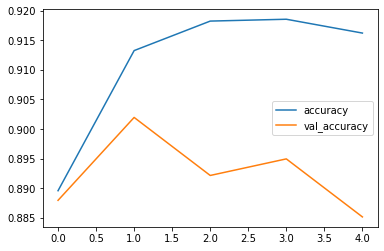

In [ ]:
losse[['accuracy','val_accuracy']].plot()

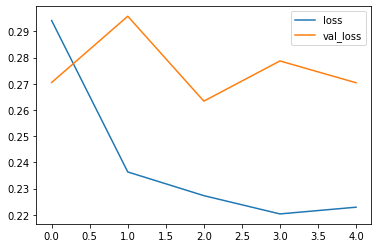

In [ ]:
losse[['loss','val_loss']].plot()

In [ ]:
val_loss, val_acc = \
my_model.evaluate_generator(test_generation)

print('val_loss:', val_loss)
print('val_acc:', val_acc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


val_loss: 0.2703745365142822
val_acc: 0.8851540684700012
